Use Ocean data from kaggle to predict the temperature of the ocean given a sality value.  

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


2. Importing dataset from Kaggle, having downloaded the bottle.csv from the website.


In [ ]:
training_ocean_dataset = pd.read_csv('bottle.csv')

In [ ]:
training_ocean_dataset.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


3. Exploratory Data Analysis

In [ ]:
training_ocean_dataset.shape

(15594, 74)

In [ ]:
training_ocean_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15594 entries, 0 to 15593
Data columns (total 74 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cst_Cnt              15594 non-null  int64  
 1   Btl_Cnt              15594 non-null  int64  
 2   Sta_ID               15594 non-null  object 
 3   Depth_ID             15594 non-null  object 
 4   Depthm               15594 non-null  int64  
 5   T_degC               15516 non-null  float64
 6   Salnty               15282 non-null  float64
 7   O2ml_L               12874 non-null  float64
 8   STheta               15232 non-null  float64
 9   O2Sat                12634 non-null  float64
 10  Oxy_µmol/Kg          12634 non-null  float64
 11  BtlNum               0 non-null      float64
 12  RecInd               15594 non-null  int64  
 13  T_prec               15516 non-null  float64
 14  T_qual               163 non-null    float64
 15  S_prec               15282 non-null 

In [ ]:
#only keep columns 'T_degC' and 'Salnty'
training_data = training_ocean_dataset[['T_degC', 'Salnty']]

In [ ]:
training_data.head()

,T_degC,Salnty
0,10.50,33.440
1,10.46,33.440
2,10.46,33.437
3,10.45,33.420
4,10.45,33.421


In [ ]:
training_data.isna().sum()

,0
T_degC,78
Salnty,312


In [ ]:
training_data.shape

(15594, 2)

In [ ]:
training_data_1 = training_data.dropna()

In [ ]:
training_data_1.isna().sum()

,0
T_degC,0
Salnty,0


In [ ]:
training_data_1

,T_degC,Salnty
0,10.50,33.440
1,10.46,33.440
2,10.46,33.437
3,10.45,33.420
4,10.45,33.421
...,...,...
15589,22.00,34.330
15590,21.01,33.980
15591,21.00,33.993
15592,20.99,34.000


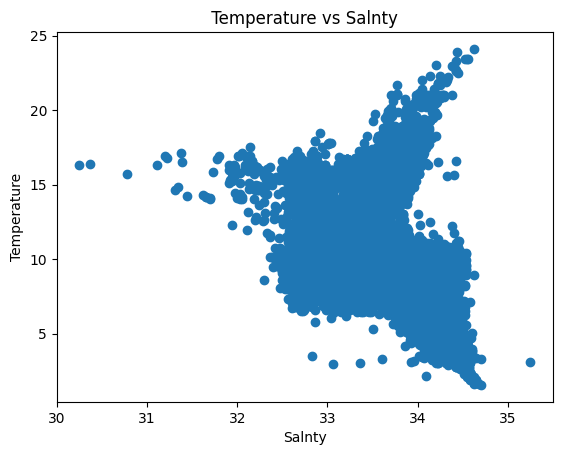

In [ ]:
#: Plot the data
plt.scatter(training_data_1['Salnty'], training_data_1['T_degC'])
plt.title(' Temperature vs Salnty ')
plt.xlabel('Salnty')
plt.ylabel('Temperature')
plt.show()

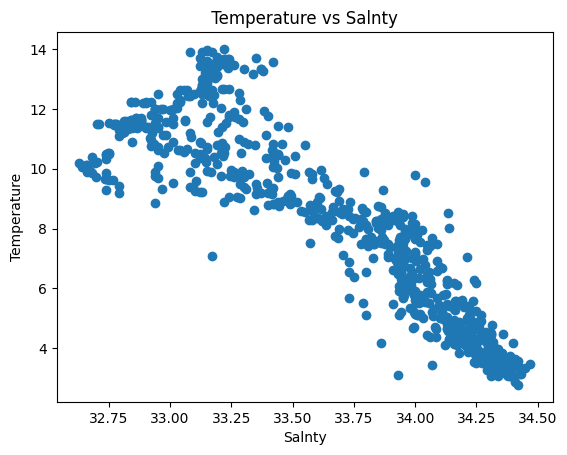

In [ ]:
#: Plot the data
training_data_750 = training_data_1[:][:750]
plt.scatter(training_data_750['Salnty'], training_data_750['T_degC'])
plt.title(' Temperature vs Salnty ')
plt.xlabel('Salnty')
plt.ylabel('Temperature')
plt.show()



In [ ]:
training_data_random_750 = training_data_1.sample(n=750, random_state=50)

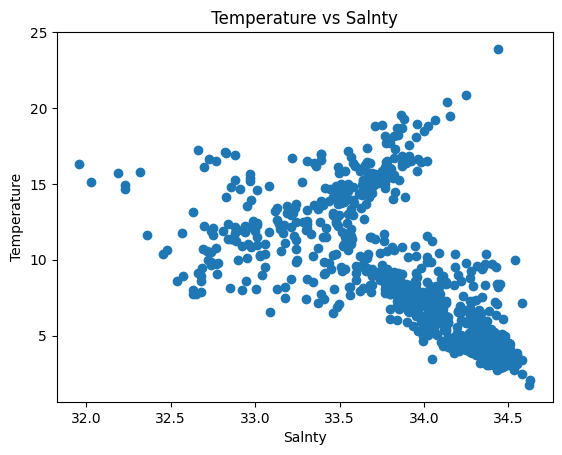

In [ ]:
plt.scatter(training_data_random_750['Salnty'], training_data_random_750['T_degC'])
plt.title(' Temperature vs Salnty ')
plt.xlabel('Salnty')
plt.ylabel('Temperature')
plt.show()


In [ ]:
#separate features from the targets, supervised learning
X = training_data_750['Salnty'].values.reshape(-1,1)

y = training_data_750['T_degC'].values.reshape(-1,1)

In [ ]:
len(X)

750

In [ ]:
len(y)

750

5. Split Validation

In [ ]:
# 80/20 train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
len(X_train)

600

In [ ]:
len(X_test)

150

6. Implement Algorithm

In [ ]:
# Training our Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

model = LinearRegression().fit(X_train, y_train)
y_prediction = model.predict(X_test)


In [ ]:
len(y_prediction)


150

In [ ]:
print("mean absolute error:",mean_absolute_error(y_test,y_prediction))
print("r2 score:",r2_score(y_test,y_prediction))
print("score:",model.score(X_test,y_test))

mean absolute error: 1.1271416785008925
r2 score: 0.812706505309285
score: 0.812706505309285


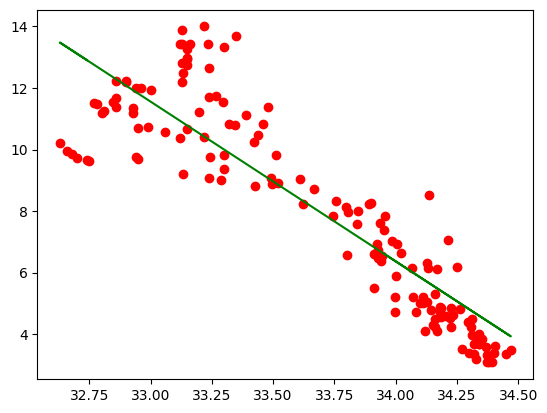

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_test,y_test,color='r')
plt.plot(X_test,y_prediction,color='g')
plt.show()

In [ ]:
#try testing
salinity=33.5
print("when salinity=",salinity,", temp is",model.predict(np.array([[salinity]])))

when salinity= 33.5 , temp is [[8.96327767]]
